In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import glob, os
from pprint import pprint
import astropy
print astropy.__version__
import math

2.0.2


In [ ]:
hdulist = fits.open('AWI0005x3s_xtc_20171104_merged.fits')

#print hdulist.info()
#pprint(hdulist[0].header)

spectra = hdulist[0].data
#print spectra.shape
#print spectra[0,:].shape
#print spectra[0,6950:7000]
#print spectra[1,6950:7000]
#print spectra[2,6950:7000]
#print spectra[3,6950:7000]
#wavelength = spectra[0,:]

f = open('AWI0005x3s_xtc_20171104_merged.txt','w')

for j in range(7978):
    f.write(str(spectra[0,j]) + ' ' + str(spectra[1,j]) + ' '+ str(spectra[2,j]) + '\n')
    
f.close()

print 'AWI0005x3s_xtc_20171104_merged written to .txt'

#---

hdulist = fits.open('AWI0005x3s_xtc_20180301_merged.fits')

#print hdulist.info()
#pprint(hdulist[0].header)

spectra = hdulist[0].data
#print spectra.shape
#print spectra[0,:].shape
#print spectra[0,6950:7000]
#print spectra[1,6950:7000]
#print spectra[2,6950:7000]
#print spectra[3,6950:7000]
#wavelength = spectra[0,:]

f = open('AWI0005x3s_xtc_20180301_merged.txt','w')

for j in range(7978):
    f.write(str(spectra[0,j]) + ' ' + str(spectra[1,j]) + ' '+ str(spectra[2,j]) + '\n')
    
f.close()

print 'AWI0005x3s_xtc_20180301_merged written to .txt'

#---

hdulist = fits.open('AWI0005x3s_xtc_20180302_merged.fits')

#print hdulist.info()
#pprint(hdulist[0].header)

spectra = hdulist[0].data
#print spectra.shape
#print spectra[0,:].shape
#print spectra[0,6950:7000]
#print spectra[1,6950:7000]
#print spectra[2,6950:7000]
#print spectra[3,6950:7000]
#wavelength = spectra[0,:]

f = open('AWI0005x3s_xtc_20180302_merged.txt','w')

for j in range(7978):
    f.write(str(spectra[0,j]) + ' ' + str(spectra[1,j]) + ' '+ str(spectra[2,j]) + '\n')
    
f.close()

print 'AWI0005x3s_xtc_20180302_merged written to .txt'

#---



In [4]:
hdulist = fits.open('HD74562_xtc_20171104_merged.fits')

#print hdulist.info()
#pprint(hdulist[0].header)

spectra = hdulist[0].data
#print spectra.shape
#print spectra[0,:].shape
#print spectra[0,6950:7000]
#print spectra[1,6950:7000]
#print spectra[2,6950:7000]
#print spectra[3,6950:7000]
#wavelength = spectra[0,:]

f = open('HD74562_xtc_20171104_merged.txt','w')

for j in range(7978):
    f.write(str(spectra[0,j]) + ' ' + str(spectra[1,j]) + ' '+ str(spectra[2,j]) + '\n')
    
f.close()

print 'HD74562_xtc_20171104_merged written to .txt'

HD74562_xtc_20171104_merged written to .txt


 ############################## Xspextool History ############################## [astropy.io.fits.card]
 ############################## Xcombspec History ############################## [astropy.io.fits.card]
 ############################### Xtellcor History ############################## [astropy.io.fits.card]
 ############################# Xmergeorders History ############################ [astropy.io.fits.card]


In [7]:
hdulist = fits.open('awi0005x3s_xtc_20171104_modVega_merged.fits')

#print hdulist.info()
#pprint(hdulist[0].header)

spectra = hdulist[0].data
#print spectra.shape
#print spectra[0,:].shape
#print spectra[0,6950:7000]
#print spectra[1,6950:7000]
#print spectra[2,6950:7000]
#print spectra[3,6950:7000]
#wavelength = spectra[0,:]

f = open('awi0005x3s_xtc_20171104_modVega_merged.txt','w')

for j in range(7978):
    f.write(str(spectra[0,j]) + ' ' + str(spectra[1,j]) + ' '+ str(spectra[2,j]) + '\n')
    
f.close()

print 'awi0005x3s_xtc_20171104_modVega_merged written to .txt'

awi0005x3s_xtc_20171104_modVega_merged written to .txt


In [5]:
class arcoiris_merged_spectrum(object):
    
    def __init__(self, name, data, date):
        self.objectname = name
        self.obsdate = date
        
        tempwav = []
        tempflux = []
        temperr = []
        #tempsnr = []
        
        for line in data:
            conts = line.split()
            tempwav.append(float(conts[0]))
            tempflux.append(float(conts[1]))
            temperr.append(float(conts[2]))
            
        self.wav = np.array(tempwav)
        self.flux = np.array(tempflux)
        self.err = np.array(temperr)
        self.snr = self.flux/self.err
        
        self.flux_watts = self.flux*10.
        self.err_watts = self.err*10.
        
    def __str__(self):
        s = 'Wav Flux Err \n'
        for i in range(self.wav.size):
            s = s + str(self.wav[i]) + ' ' + str(self.flux[i]) + ' ' + str(self.err[i]) + '\n'
            
        return s
    
    def get_snr_cut_spectrum(self,snrthreshold):
        
        wav = np.array([self.wav[i] for i in range(self.wav.size) if self.snr[i] > snrthreshold])
        flux = np.array([self.flux[i] for i in range(self.wav.size) if self.snr[i] > snrthreshold])
        err = np.array([self.err[i] for i in range(self.wav.size) if self.snr[i] > snrthreshold])
        
        return wav, flux, err
    
    def get_snr_cut_spectrum_watts(self,snrthreshold):
        
        wav = np.array([self.wav[i] for i in range(self.wav.size) if self.snr[i] > snrthreshold])
        flux = np.array([self.flux_watts[i] for i in range(self.wav.size) if self.snr[i] > snrthreshold])
        err = np.array([self.err_watts[i] for i in range(self.wav.size) if self.snr[i] > snrthreshold])
        
        return wav, flux, err
        
        
class spex_spectrum(object):
    def __init__(self, data):
        
        first_row_found = False
        first_row_index = -1
        linecount = 0
        while not first_row_found:
            if data[linecount][0] == '#':
                linecount += 1
            else:
                first_row_index = linecount
                first_row_found = True
                
        print 'First row found:', first_row_index
       
        spectral_data = data[first_row_index:]

        full_wavelength_list = []
        full_flux_density_list = []
        full_error_list = []        
        short_wavelength_list = []
        short_flux_density_list = []
        short_error_list = []
        long_wavelength_list = []
        long_flux_density_list = []
        long_error_list = []

        
        for line in spectral_data:
            comps = line.split()
            wav = float(comps[0])
            flux = float(comps[1])
            error = float(comps[2])
        
            if (wav < -900.) or (flux < -900.) or (error < -900.):
                continue

            full_wavelength_list.append(float(comps[0]))
            full_flux_density_list.append(float(comps[1]))
            full_error_list.append(float(comps[2]))
            
            if wav < 2.75:
                short_wavelength_list.append(float(comps[0]))
                short_flux_density_list.append(float(comps[1]))
                short_error_list.append(float(comps[2]))
            else:
                long_wavelength_list.append(float(comps[0]))
                long_flux_density_list.append(float(comps[1]))
                long_error_list.append(float(comps[2]))                
        
        self.full_wavelength = np.array(full_wavelength_list)
        self.full_flux_density = np.array(full_flux_density_list)
        self.full_error = np.array(full_error_list)
        
        self.short_wavelength = np.array(short_wavelength_list)
        self.short_flux_density = np.array(short_flux_density_list)
        self.short_error = np.array(short_error_list)
        self.long_wavelength = np.array(long_wavelength_list)
        self.long_flux_density = np.array(long_flux_density_list)
        self.long_error = np.array(long_error_list)
    
        return

In [6]:
def import_arcoiris_from_text(filename, name, date):
    with open(filename) as f:
        data = f.readlines()
        
    spectrum = arcoiris_merged_spectrum(name, data, date)
    
    return spectrum

def import_spex_spectrum_from_file(filename):
    
    with open(filename) as f:
        imported_data = f.readlines()
        
    spectrum = spex_spectrum(imported_data)
    return spectrum

In [8]:
HD74562_20171104_merged = import_arcoiris_from_text('HD74562_xtc_20171104_merged.txt','HD74562','2017-11-04')
awi0005x3s_20171104_modVega_merged = import_arcoiris_from_text('awi0005x3s_xtc_20171104_modVega_merged.txt','AWI0005x3s_modVega','2017-11-04')



In [29]:
def insort(a, b, kind='mergesort'):
    # took mergesort as it seemed a tiny bit faster for my sorted large array try.
    c = np.concatenate((a, b)) # we still need to do this unfortunatly.
    c.sort(kind=kind)
    flag = np.ones(len(c), dtype=bool)
    np.not_equal(c[1:], c[:-1], out=flag[1:])
    return c[flag]

First row found: 47


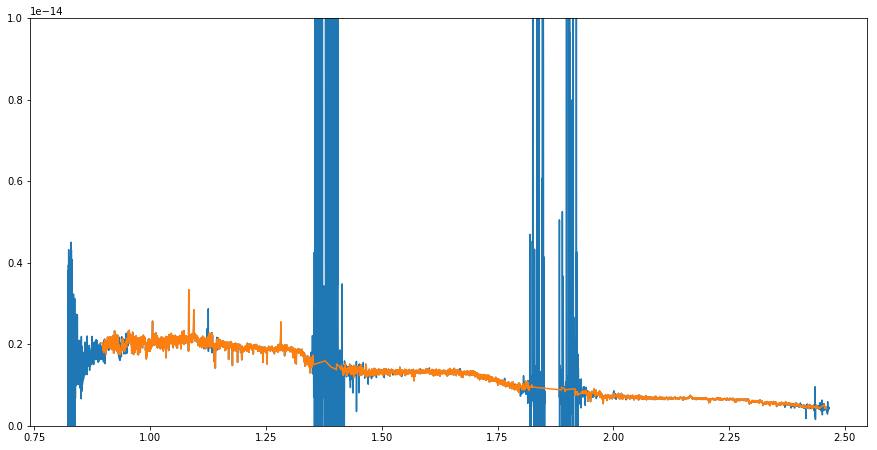

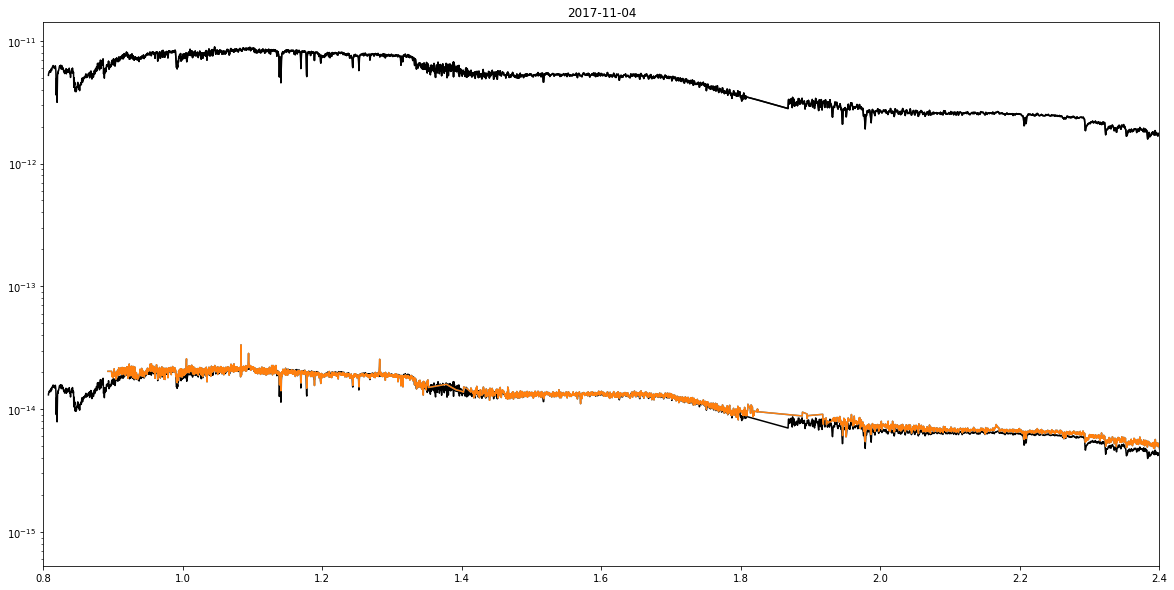

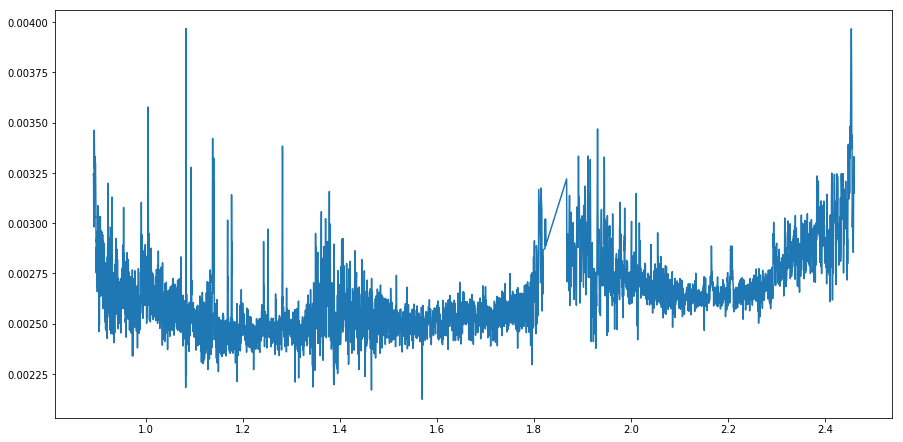

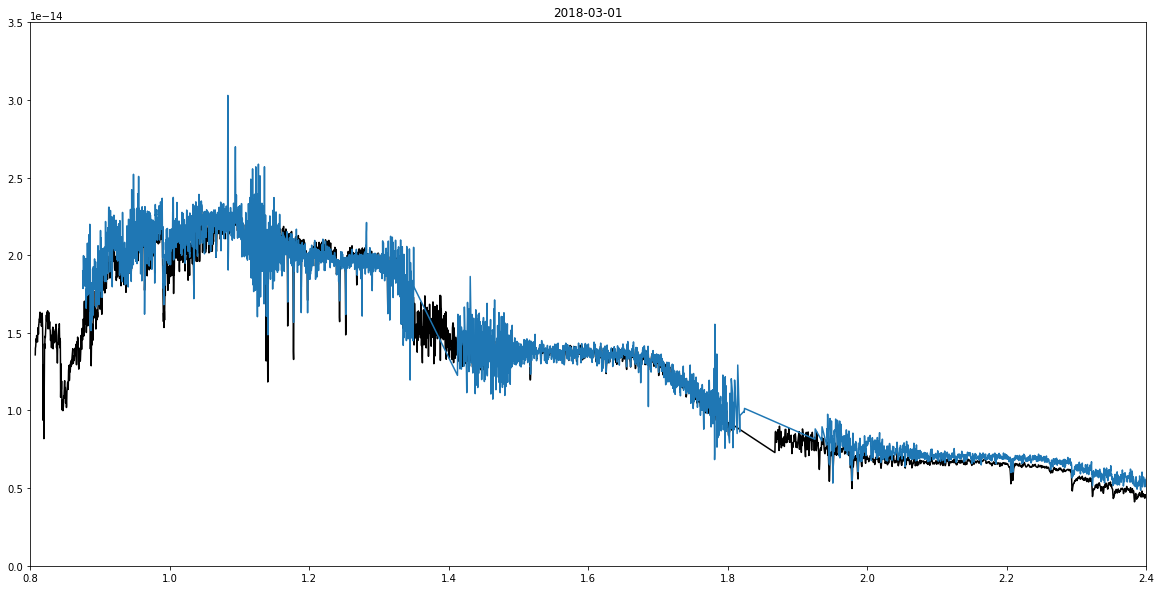

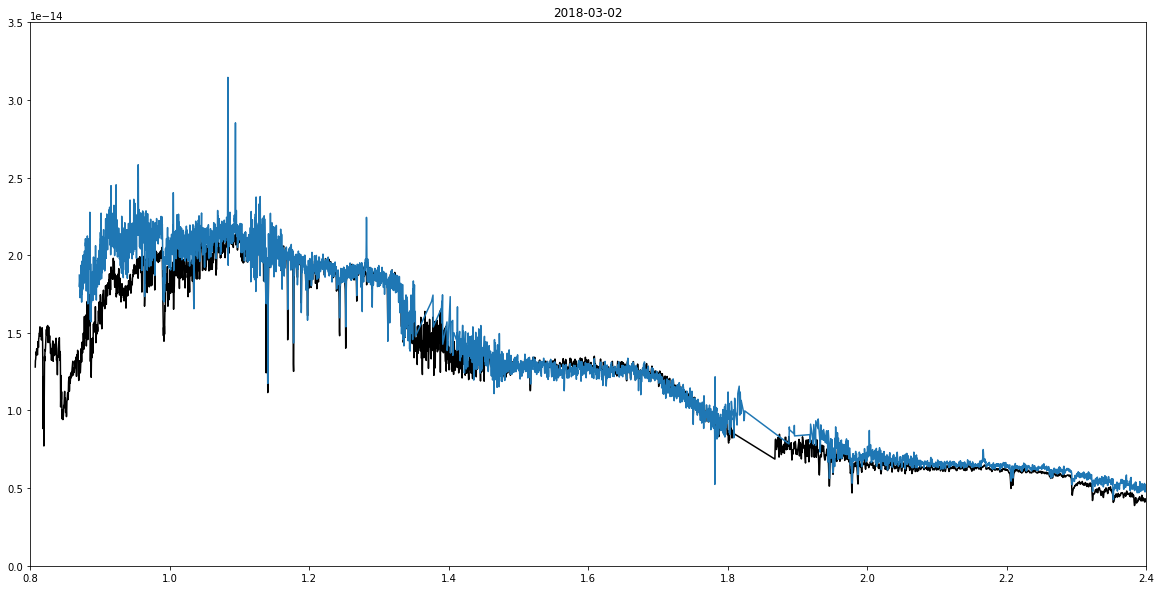

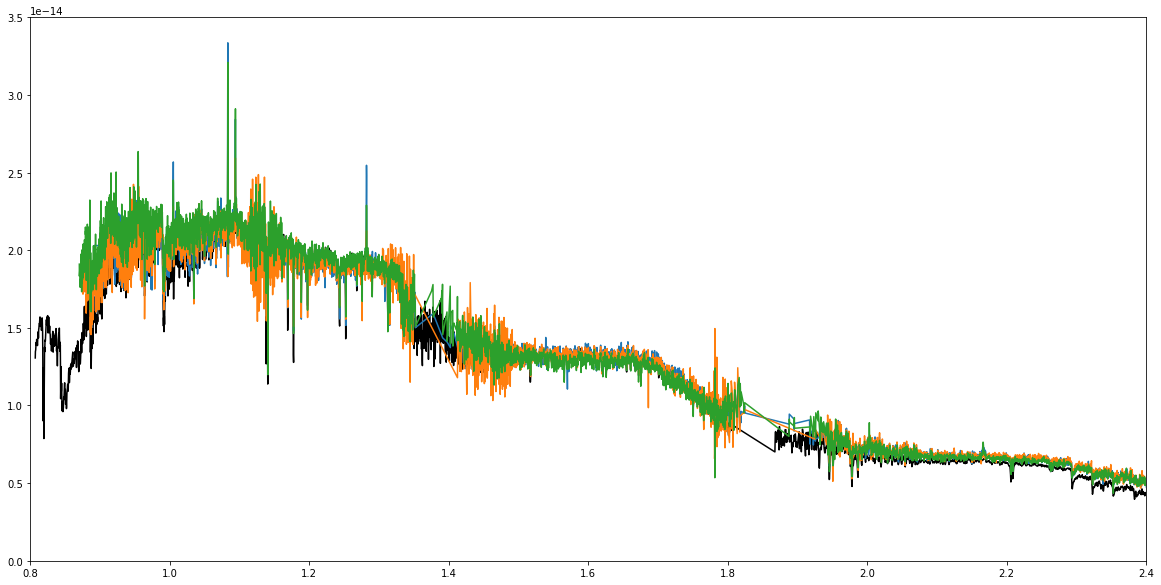

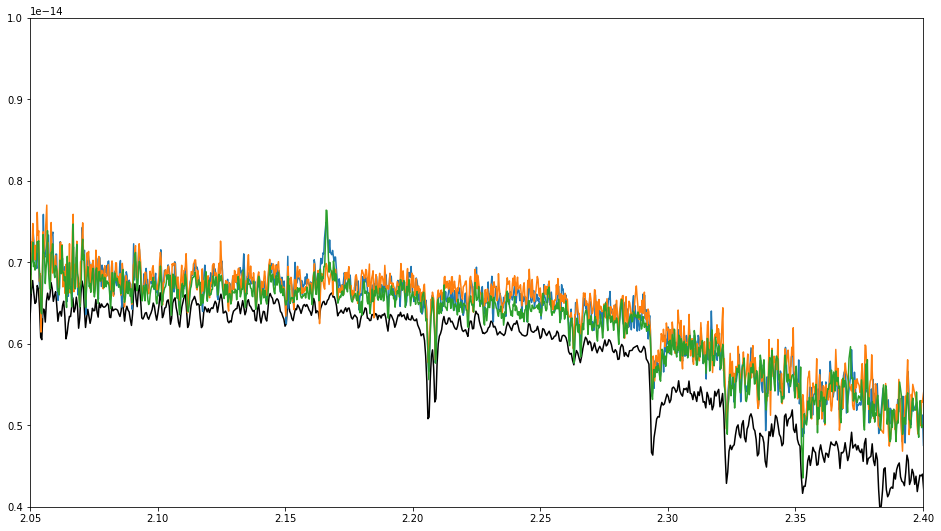

In [85]:
awi0005x3s_20171104_merged = import_arcoiris_from_text('AWI0005x3s_xtc_20171104_merged.txt','AWI0005x3s','2017-11-04')
awi0005x3s_20180301_merged = import_arcoiris_from_text('AWI0005x3s_xtc_20180301_merged.txt','AWI0005x3s','2018-03-01')
awi0005x3s_20180302_merged = import_arcoiris_from_text('AWI0005x3s_xtc_20180302_merged.txt','AWI0005x3s','2018-03-02')

template_spectrum = import_spex_spectrum_from_file('M5V_Gl866ABC.txt')

awi0005x3s_20171104_wav_use, awi0005x3s_20171104_flux_use, awi0005x3s_20171104_err_use = awi0005x3s_20171104_merged.get_snr_cut_spectrum_watts(20.)
awi0005x3s_20180301_wav_use, awi0005x3s_20180301_flux_use, awi0005x3s_20180301_err_use = awi0005x3s_20180301_merged.get_snr_cut_spectrum_watts(20.)
awi0005x3s_20180302_wav_use, awi0005x3s_20180302_flux_use, awi0005x3s_20180302_err_use = awi0005x3s_20180302_merged.get_snr_cut_spectrum_watts(20.)


telluric_wavs = [awi0005x3s_20171104_merged.wav[i] for i in range(awi0005x3s_20171104_merged.wav.size) if awi0005x3s_20171104_merged.wav[i] not in awi0005x3s_20171104_wav_use]

#print telluric_wavs

plt.figure(figsize=(15,7.5))
plt.plot(awi0005x3s_20171104_merged.wav, awi0005x3s_20171104_merged.flux)
plt.plot(awi0005x3s_20171104_wav_use, awi0005x3s_20171104_flux_use/10.)
#plt.xlim([1.1,1.2])
#plt.xlim([2.25,2.5])
plt.ylim([0.,1.0e-14])
plt.show()

#i = 1
#while i < (len(awi0005x3s_20171104_wav_use) - 1):
#    if (awi0005x3s_20171104_wav_use[i+1] - awi0005x3s_20171104_wav_use[i]) > (5.*(awi0005x3s_20171104_wav_use[i] - awi0005x3s_20171104_wav_use[i-1])):
#        telluric_wavs.append(awi0005x3s_20171104_wav_use[i])
#        telluric_wavs.append(awi0005x3s_20171104_wav_use[i+1])
        
#    i+=1
    
#print 'telluric_wavs:', telluric_wavs


combined_grid_mdwarf = insort(awi0005x3s_20171104_wav_use, template_spectrum.full_wavelength[370:4377])

template_spectrum_combined_grid_flux = np.interp(combined_grid_mdwarf, template_spectrum.full_wavelength, template_spectrum.full_flux_density)
awi0005x3s_20171104_combined_grid_flux_use = np.interp(combined_grid_mdwarf, awi0005x3s_20171104_wav_use, awi0005x3s_20171104_flux_use)

plt.figure(figsize=(20.,10.))
plt.plot(template_spectrum.full_wavelength, template_spectrum.full_flux_density, 'k')
plt.plot(template_spectrum.full_wavelength, template_spectrum.full_flux_density*0.0025,'k')
plt.plot(awi0005x3s_20171104_wav_use, awi0005x3s_20171104_flux_use)
plt.plot(combined_grid_mdwarf, template_spectrum_combined_grid_flux,'k')
plt.plot(combined_grid_mdwarf, awi0005x3s_20171104_combined_grid_flux_use)
plt.xlim([0.8,2.4])
#plt.ylim([0.,3.5e-14])
plt.yscale("log",nonposy='clip')
plt.title('2017-11-04')
plt.show()

div = awi0005x3s_20171104_combined_grid_flux_use / template_spectrum_combined_grid_flux

plt.figure(figsize=(15., 7.5))
plt.plot(combined_grid_mdwarf, div)
plt.show()

plt.figure(figsize=(20.,10.))
plt.plot(template_spectrum.full_wavelength, template_spectrum.full_flux_density*0.0026,'k')
plt.plot(awi0005x3s_20180301_wav_use, awi0005x3s_20180301_flux_use)
plt.xlim([0.8,2.4])
plt.ylim([0.,3.5e-14])
plt.title('2018-03-01')
plt.show()

plt.figure(figsize=(20.,10.))
plt.plot(template_spectrum.full_wavelength, template_spectrum.full_flux_density*0.00245,'k')
plt.plot(awi0005x3s_20180302_wav_use, awi0005x3s_20180302_flux_use)
plt.xlim([0.8,2.4])
plt.ylim([0.,3.5e-14])
plt.title('2018-03-02')
plt.show()

plt.figure(figsize=(20.,10.))
plt.plot(template_spectrum.full_wavelength, template_spectrum.full_flux_density*0.0025,'k')
plt.plot(awi0005x3s_20171104_wav_use, awi0005x3s_20171104_flux_use)
plt.plot(awi0005x3s_20180301_wav_use, awi0005x3s_20180301_flux_use*(0.0025/0.0026))
plt.plot(awi0005x3s_20180302_wav_use, awi0005x3s_20180302_flux_use*(0.0025/0.00245))
plt.xlim([0.8,2.4])
plt.ylim([0.,3.5e-14])
plt.show()

plt.figure(figsize=(16.,9.))
plt.plot(template_spectrum.full_wavelength, template_spectrum.full_flux_density*0.0025,'k')
plt.plot(awi0005x3s_20171104_wav_use, awi0005x3s_20171104_flux_use)
plt.plot(awi0005x3s_20180301_wav_use, awi0005x3s_20180301_flux_use*(0.0025/0.0026))
plt.plot(awi0005x3s_20180302_wav_use, awi0005x3s_20180302_flux_use*(0.0025/0.00245))
plt.xlim([2.05,2.4])
plt.ylim([0.4e-14,1.0e-14])
plt.show()





#print min(awi0005x3s_20171104_wav_use), max(awi0005x3s_20171104_wav_use)
#print min(template_spectrum.full_wavelength), max(template_spectrum.full_wavelength)

#print template_spectrum.full_wavelength[370], template_spectrum.full_wavelength[4376]

#tempgrid = np.linspace(0.9,2.4,10000.)
#template_flux_rebinned = np.interp(combined_grid, template_spectrum.full_wavelength, template_spectrum.full_flux_density)
#template_err_rebinned = np.interp(combined_grid, template_spectrum.full_wavelength, template_spectrum.full_error)
#target_flux_rebinned = np.interp(combined_grid, awi0005x3s_20171104_wav_use, awi0005x3s_20171104_flux_use)
#target_err_rebinned = np.interp(combined_grid, awi0005x3s_20171104_wav_use, awi0005x3s_20171104_err_use)

#plt.figure()
#plt.plot(combined_grid, template_flux_rebinned*0.0025)
#plt.plot(combined_grid, target_flux_rebinned)
#plt.show()

#subtracted_flux = target_flux_rebinned - (0.0025*template_flux_rebinned)
#subtraction_err = np.power((np.power(target_err_rebinned,2)+np.power((0.0025*template_err_rebinned),2.)),0.5)
#subtraction_snr = subtracted_flux / subtraction_err

#plt.figure()
#plt.plot(combined_grid, (target_flux_rebinned - (0.0025*template_flux_rebinned)))

#plt.plot(combined_grid, subtraction_err)
#plt.show()

#plt.figure()
#plt.plot(combined_grid, subtraction_snr)
#plt.plot(combined_grid, np.ones(combined_grid.size)*3.)
#plt.xlim([2.1,2.2])
#plt.show()

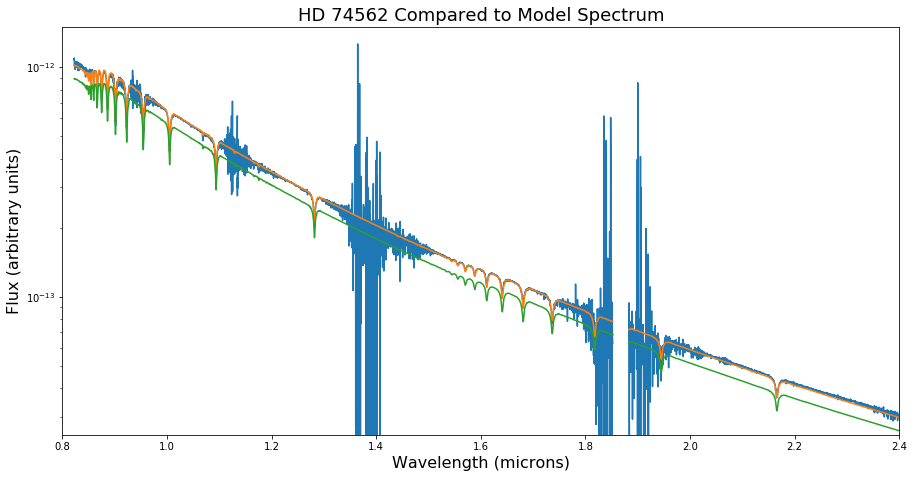

nan


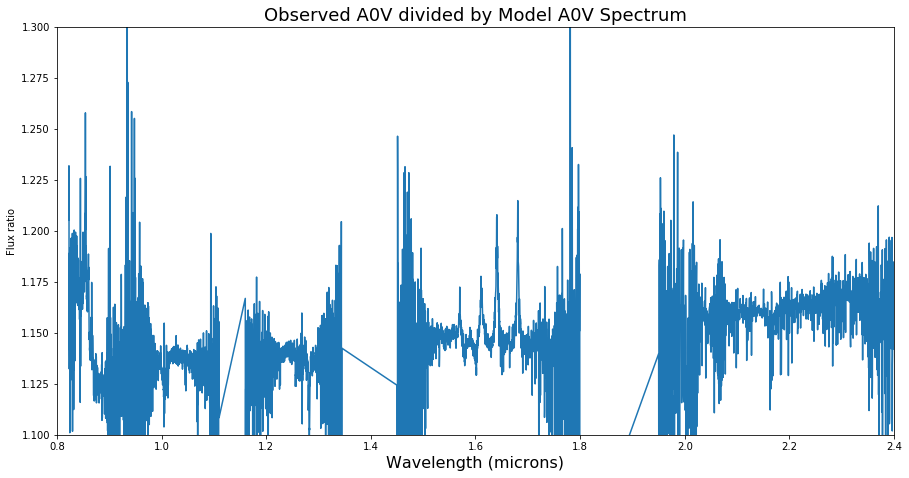

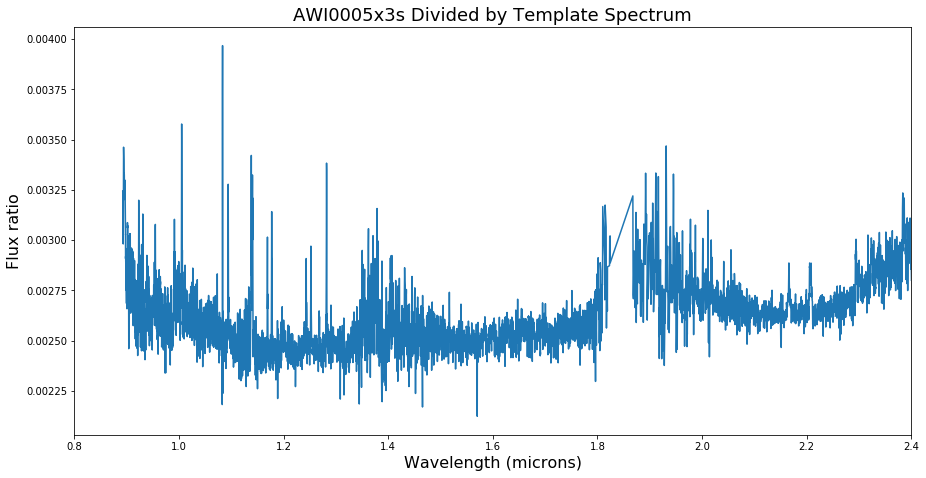

In [112]:
plt.figure(figsize=(15.,7.5))
plt.plot(HD74562_20171104_merged.wav, HD74562_20171104_merged.flux)
plt.plot(awi0005x3s_20171104_modVega_merged.wav, awi0005x3s_20171104_modVega_merged.flux/0.875)
plt.plot(awi0005x3s_20171104_modVega_merged.wav, awi0005x3s_20171104_modVega_merged.flux)
#plt.plot(HD74562_20171104_merged.wav, HD74562_20171104_merged.flux*0.88)
plt.xlim([0.8,2.4])
plt.ylim([2.5e-14,1.5e-12])
plt.xlabel('Wavelength (microns)',fontsize=16)
plt.ylabel('Flux (arbitrary units)',fontsize=16)
plt.title('HD 74562 Compared to Model Spectrum',fontsize=18)
plt.yscale("log",nonposy='clip')
plt.show()

combined_grid = insort(HD74562_20171104_merged.wav, awi0005x3s_20171104_modVega_merged.wav)

HD74562_flux_interp = np.interp(combined_grid, HD74562_20171104_merged.wav, HD74562_20171104_merged.flux)
awi0005x3s_flux_interp = np.interp(combined_grid, awi0005x3s_20171104_modVega_merged.wav, awi0005x3s_20171104_modVega_merged.flux)

#dif = (HD74562_flux_interp*0.88) - awi0005x3s_flux_interp

zeros = np.zeros(combined_grid.size)

avg = np.sum(dif)/combined_grid.size
print avg

#plt.figure(figsize=(20.,10.))
#plt.plot(template_spectrum.full_wavelength, template_spectrum.full_flux_density, 'k')
#plt.plot(template_spectrum.full_wavelength, template_spectrum.full_flux_density*0.0025,'k')
#plt.plot(awi0005x3s_20171104_wav_use, awi0005x3s_20171104_flux_use)
#plt.plot(combined_grid_mdwarf, template_spectrum_combined_grid_flux,'k')
#plt.plot(combined_grid_mdwarf, awi0005x3s_20171104_combined_grid_flux_use)
#plt.xlim([0.8,2.4])
#plt.ylim([0.,3.5e-14])
#plt.yscale("log",nonposy='clip')
#plt.title('2017-11-04')
#plt.show()

combined_grid_use = []

for x in combined_grid:
    if x < 1.11 or (x > 1.16 and x < 1.345) or (x > 1.45 and x < 1.80) or (x > 1.95):
        combined_grid_use.append(x)
    
HD74562_flux_interp_use = np.interp(combined_grid_use, HD74562_20171104_merged.wav, HD74562_20171104_merged.flux)
awi0005x3s_flux_interp_use = np.interp(combined_grid_use, awi0005x3s_20171104_modVega_merged.wav, awi0005x3s_20171104_modVega_merged.flux)

div_a0v = HD74562_flux_interp_use / awi0005x3s_flux_interp_use
#comp = np.ones(combined_grid.size)/0.875
#comp1 = np.ones(combined_grid.size)*((1-(0.8785*0.01))/0.8785) + (0.01*combined_grid)
plt.figure(figsize=(15.,7.5))
plt.plot(combined_grid_use, div_a0v)
#plt.plot(combined_grid, comp,'k')
#plt.plot(combined_grid, comp1)
#plt.xlim([0.9,1.875])
plt.xlabel('Wavelength (microns)',fontsize=16)
plt.ylabel('Flux ratio')
plt.xlim([0.8,2.4])
plt.ylim([1.1,1.3])
plt.title('Observed A0V divided by Model A0V Spectrum',fontsize=18)
plt.show()

#plt.figure(figsize=(20.,10.))
#plt.plot(combined_grid, dif)
#plt.plot(combined_grid, zeros)
#plt.xlim([0.75,2.5])
#plt.ylim([-0.01e-12,1.0e-12])
#plt.show()

#plt.figure(figsize=(20.,10))
#plt.plot(combined_grid, ((div_a0v - comp)/comp))
#plt.show()

#avg_comps = np.sum(div_a0v)/div_a0v.size
#print avg

#avg_err = np.sum((div_a0v - comp)/comp)/div_a0v.size

#err = (div_a0v - comp)/comp

#dif_div = div_a0v - comp

#plt.figure()
#plt.plot(combined_grid, dif_div)
#plt.ylim([-0.25,0.25])
#plt.show()

#err_use = np.array([err[i] for i in range(err.size) if not math.isnan(err[i])])

#square_err = err_use**2

#sum_square_err = np.sum(square_err)
#print sum_square_err

#mean_square_err = sum_square_err/square_err.size
#print mean_square_err

#rmse = np.sqrt(mean_square_err)
#print rmse


div_mdwarf = awi0005x3s_20171104_combined_grid_flux_use / template_spectrum_combined_grid_flux

plt.figure(figsize=(15., 7.5))
plt.plot(combined_grid_mdwarf, div)
plt.xlabel('Wavelength (microns)',fontsize=16)
plt.ylabel('Flux ratio', fontsize=16)
plt.xlim([0.8,2.4])
plt.title('AWI0005x3s Divided by Template Spectrum', fontsize=18)
plt.show()